## Análisis EDA: Participantes Proveedores

### 1. Carga de datos

In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### Leyendo el dataset, convirtiéndolo a parquet y mostrando los primeros rows

In [2]:
proveedores_df = pd.read_csv('../../data/Processed/All_Tables_Raw/participantes_proveedores_v2_Raw.csv')
proveedores_df.to_parquet('../../data/Processed/parquet_files/participantes_proveedores_v2_Raw.parquet')

In [3]:
proveedores_df = pd.read_parquet('../../data/Processed/parquet_files/participantes_proveedores_v2_Raw.parquet')

In [4]:
proveedores_df.shape

(5623393, 16)

### 2. Análisis del problema

#### 2.1 Estructura de los datos

In [5]:
proveedores_df.head()

,cve_expediente,cve_contrato,identifier_id,roles,name,identifier_legalName,identifier_scheme,identifier_uri,address_countryName,address_locality,address_postalCode,address_region,address_streetAddress,contactPoint_email,contactPoint_name,contactPoint_telephone
0,1892834,2038777.00,04B3DC027ADD775B746959A20A80292A,"['tenderer', 'supplier']","APLICACIONES INDUSTRIALES DE CALIDAD, S.A. DE ...","APLICACIONES INDUSTRIALES DE CALIDAD, S.A. DE ...",MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,ESTADO DE MEXICO,None,MX-MEX,None,ma.buzo@issste.gob.mx,- (Cuenta administrada por 'ISSSTE-Hospital Re...,None
1,2010079,2186605.00,5BECD127FEA6806B2A404D2B14A9CEEE,"['tenderer', 'supplier']",LEONOR HILDA BARRIOS SANCHEZ,LEONOR HILDA BARRIOS SANCHEZ,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Centro,86284,MX-TAB,Senda de guayacan Mz 13 Lote 8 Parrilla 2,leona_b1364@hotmail.com,LEONOR HILDA BARRIOS SANCHEZ,993-1576647
2,2039835,2591875.00,TIN090211JC9,"['tenderer', 'supplier']",TOKA INTERNACIONAL S A P I DE CV,TOKA INTERNACIONAL S A P I DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Zapopan,45086,MX-JAL,Ave. Montemorelos 3838-A Col. Loma Bonita,saul.davila@toka.mx; maricela.melendez@toka.mx...,SAUL GUILLERMO DAVILA JUAREZ,01 5531404494
3,2058673,2248316.00,3CEDE48206129D952B3EA0B6EA3E093D,"['tenderer', 'supplier']",PATRICIA SELENE SOLIS GALLEGOS,PATRICIA SELENE SOLIS GALLEGOS,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Chihuahua,31137,MX-CHH,Diego Lucero 2 20 Aniversario,patriciasolis707@gmail.com,PATRICIA SELENE SOLIS GALLEGOS,614-2747722
4,2071481,2264071.00,AAB6B3F29F29293964209B17E7D72DAC,"['tenderer', 'supplier']",LUIS ALBERTO ESPINOZA VAZQUEZ,LUIS ALBERTO ESPINOZA VAZQUEZ,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,ECATEPEC DE MORELOS,None,MX-MEX,None,aarellano@inifed.gob.mx,- (Cuenta administrada por 'INIFED-Gerencia de...,None


In [6]:
proveedores_df.tail()

,cve_expediente,cve_contrato,identifier_id,roles,name,identifier_legalName,identifier_scheme,identifier_uri,address_countryName,address_locality,address_postalCode,address_region,address_streetAddress,contactPoint_email,contactPoint_name,contactPoint_telephone
5623388,2571132,2984657.00,TSO060406Q24,"['tenderer', 'supplier']",TEC SOLUCIONES SA DE CV,TEC SOLUCIONES SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,CUAUHTEMOC,06100,MX-CMX,AV. NUEVOLEON,tec_soluciones@yahoo.com.mx,JOSE RAMON TIRADO FRANCO,01 55 55 32 20 57
5623389,2571343,NaN,GBR100526RJ7,['tenderer'],GRUPO BRITAY SA DE CV,GRUPO BRITAY SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,TLALNEPANTLA,54030,MX-MEX,AZTECAS NUM. 122 COL. LA ROMANA,grupobritay77@gmail.com,None,52 55 53 09 93 80
5623390,2571343,NaN,PCY0912166V8,['tenderer'],"PROYECTOS, CONSTRUCCION Y SUMINISTRO SIAP SA D...","PROYECTOS, CONSTRUCCION Y SUMINISTRO SIAP SA D...",MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,IZTACALCO,08830,MX-CMX,"PLAYA CALETA NÚM. 399, COLONIA MILITAR MARTE",salvador_siap@yahoo.com.mx; caballero-piter@ho...,None,52 55 56342942 044 55 41420585
5623391,2571413,2987037.00,TLS1407293Q8,"['tenderer', 'supplier']",TEXTILES LUNA Y SOL SA DE CV,TEXTILES LUNA Y SOL SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,Tlalpan,14200,MX-CMX,TEYA 447 EJIDOS DE PADIERNA,sgonzalez@textileslunaysol.mx;ventasgobiernote...,SONIA ISELA GONZALEZ IRIGOYEN,55-56456652
5623392,2571566,2987316.00,OPE070326DNA,"['tenderer', 'supplier']",OPERBES SA DE CV,OPERBES SA DE CV,MX-RFC,https://portalsat.plataforma.sat.gob.mx/Consul...,MÉXICO,ALVARO OBREGON,None,MX-MEX,None,hector.hernandez@hraev.gob.mx,- (Cuenta administrada por 'HRAEV-Dirección de...,None


#### 2.2 Información General

In [7]:
proveedores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5623393 entries, 0 to 5623392
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   cve_expediente          int64  
 1   cve_contrato            float64
 2   identifier_id           object 
 3   roles                   object 
 4   name                    object 
 5   identifier_legalName    object 
 6   identifier_scheme       object 
 7   identifier_uri          object 
 8   address_countryName     object 
 9   address_locality        object 
 10  address_postalCode      object 
 11  address_region          object 
 12  address_streetAddress   object 
 13  contactPoint_email      object 
 14  contactPoint_name       object 
 15  contactPoint_telephone  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 686.4+ MB


#### 2.3 Estadísticas descriptivas

En este caso no hay estadísticas descriptivas porque no hay variables numéricas en esta tabla

### 3. Análisis Univariado

### 4.2 Variables Categóricas

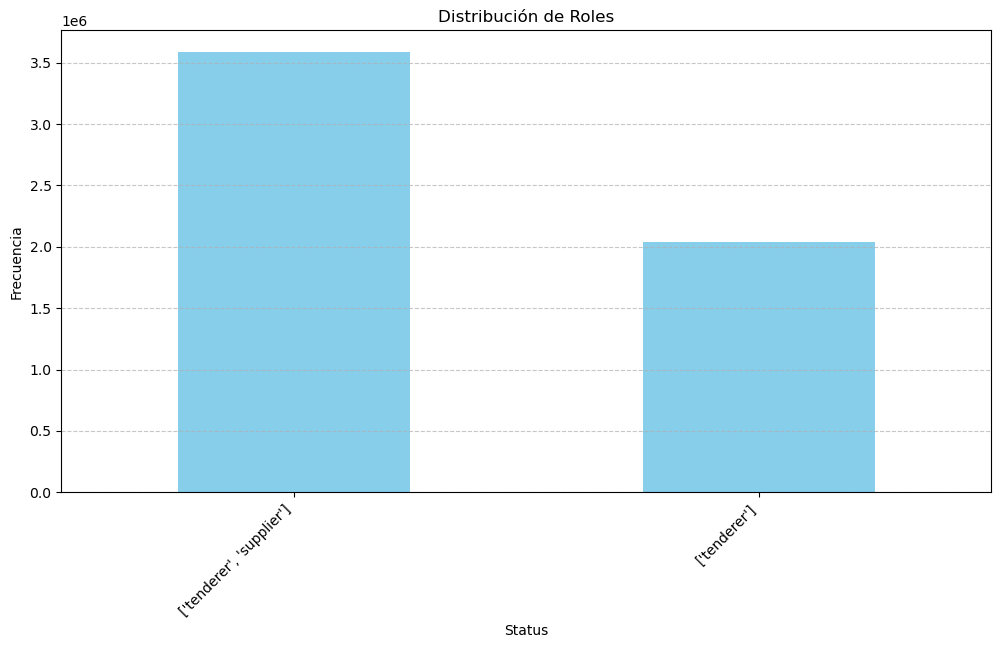

In [16]:
# Generar histograma para la variable 'roles'
plt.figure(figsize=(12, 6))
proveedores_df['roles'].value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.xlabel('Status')
plt.ylabel('Frecuencia')
plt.title('Distribución de Roles')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

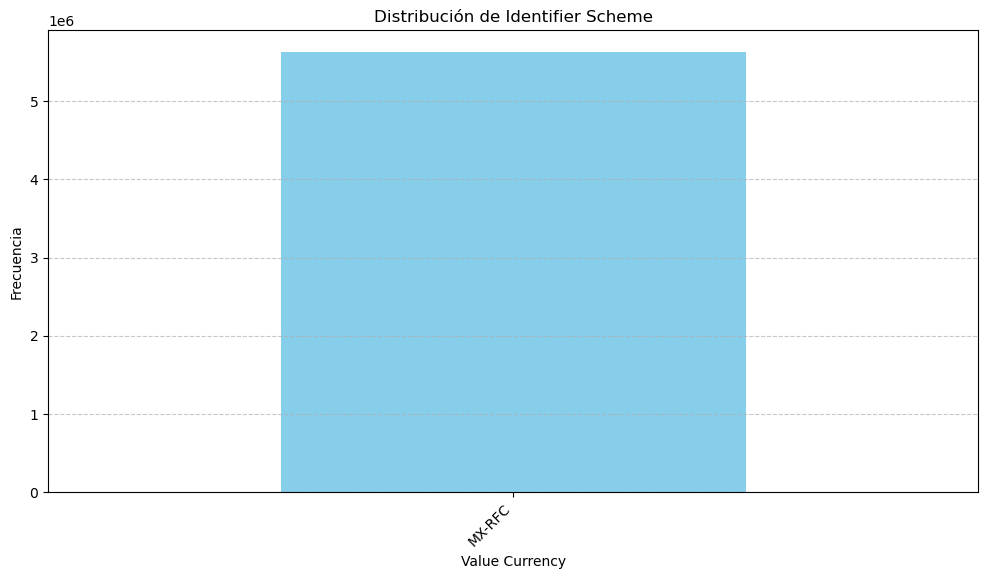

In [17]:
# Generar histograma para la variable 'identifier_scheme'
plt.figure(figsize=(12, 6))
proveedores_df['identifier_scheme'].value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.xlabel('Value Currency')
plt.ylabel('Frecuencia')
plt.title('Distribución de Identifier Scheme')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

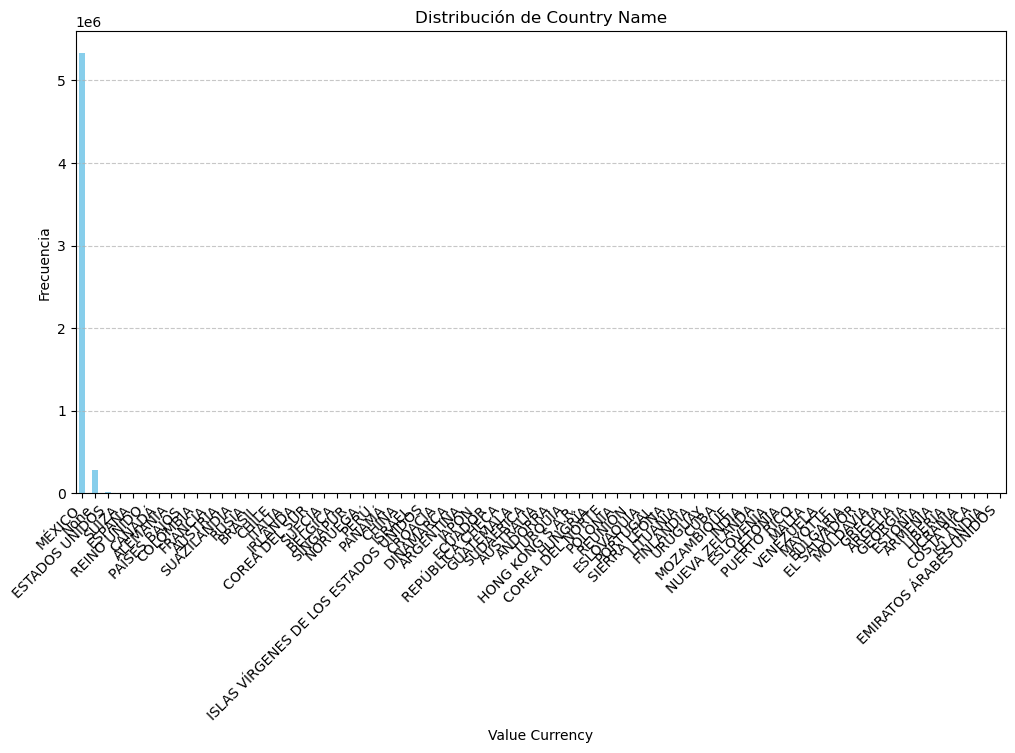

In [18]:
# Generar histograma para la variable Country Name
plt.figure(figsize=(12, 6))
proveedores_df['address_countryName'].value_counts(dropna=False).plot(kind='bar', color='skyblue')
plt.xlabel('Value Currency')
plt.ylabel('Frecuencia')
plt.title('Distribución de Country Name')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 5. Detección de Outliers

En este caso no hay detección de outliers porque no hay variables numéricas

### 7. Preguntas de Negocio

#### 7.1 Cuáles son los países con más proveedores, excluyendo México 

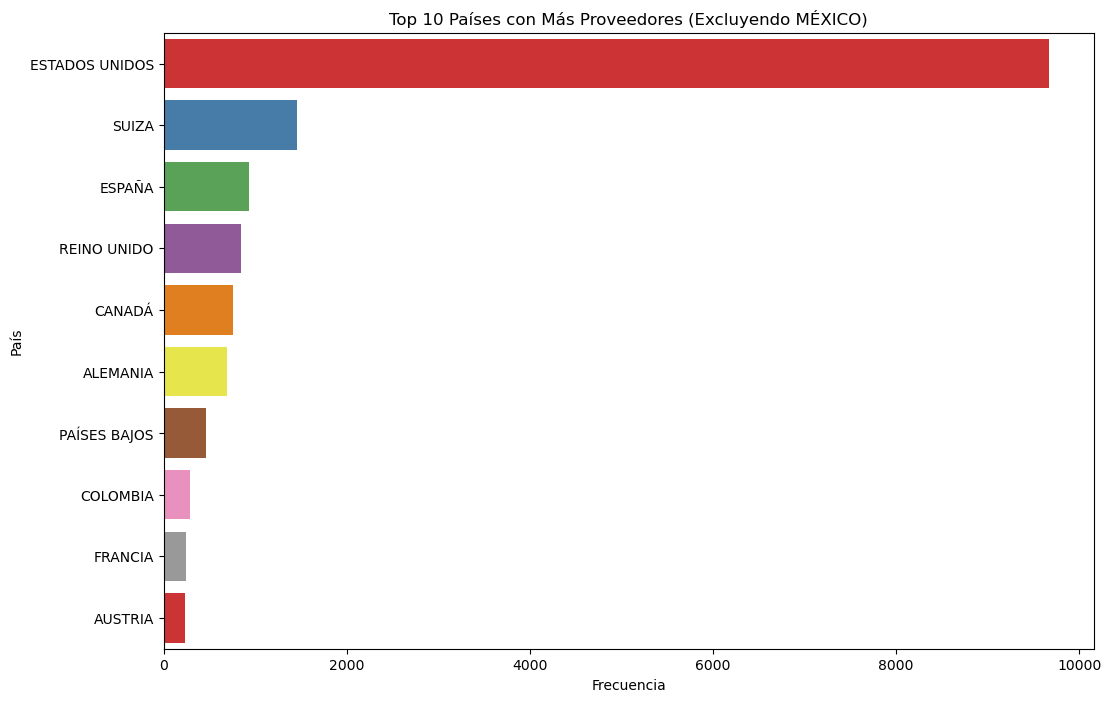

In [24]:
# Top 10 países con más proveedores excluyendo "MÉXICO"
top_10_countries_excluding_mexico = proveedores_df[proveedores_df['address_countryName'] != 'MÉXICO']['address_countryName'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_countries_excluding_mexico.index, x=top_10_countries_excluding_mexico.values, palette='Set1')
plt.title('Top 10 Países con Más Proveedores (Excluyendo MÉXICO)')
plt.xlabel('Frecuencia')
plt.ylabel('País')
plt.show()

#### 7.2 Cuáles son las regiones de México con más proveedores?

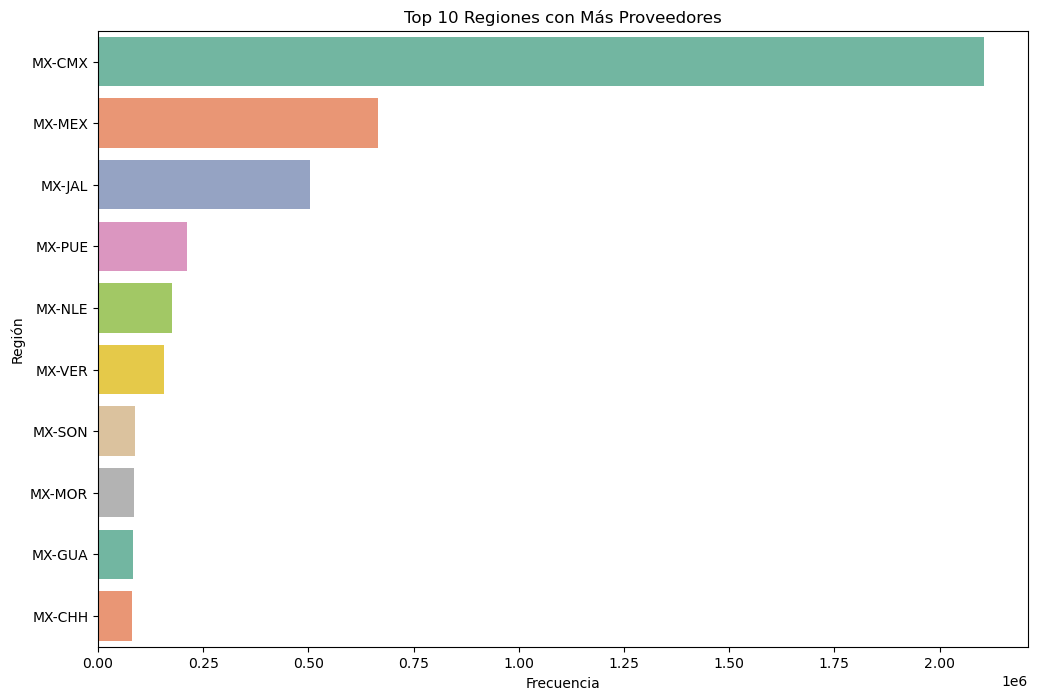

In [23]:
# Top 10 regiones con más proveedores
top_10_regions = proveedores_df['address_region'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_regions.index, x=top_10_regions.values, palette='Set2')
plt.title('Top 10 Regiones con Más Proveedores')
plt.xlabel('Frecuencia')
plt.ylabel('Región')
plt.show()

#### 7.3 Calidad de Información en datos de contacto

In [26]:
# Verificar datos de contacto completos
proveedores_df['contact_complete'] = proveedores_df[['contactPoint_email', 'contactPoint_name', 'contactPoint_telephone']].notnull().all(axis=1)

# Número de proveedores con datos de contacto completos
num_complete_contacts = proveedores_df['contact_complete'].sum()

# Porcentaje de proveedores con datos de contacto completos
percent_complete_contacts = (num_complete_contacts / len(proveedores_df)) * 100

# Número de proveedores con datos de contacto faltantes
num_incomplete_contacts = len(proveedores_df) - num_complete_contacts

# Porcentaje de proveedores con datos de contacto faltantes
percent_incomplete_contacts = (num_incomplete_contacts / len(proveedores_df)) * 100

# Resultados
print(f"Número de proveedores con datos de contacto completos: {num_complete_contacts}")
print(f"Porcentaje de proveedores con datos de contacto completos: {percent_complete_contacts:.2f}%")
print(f"Número de proveedores con datos de contacto faltantes: {num_incomplete_contacts}")
print(f"Porcentaje de proveedores con datos de contacto faltantes: {percent_incomplete_contacts:.2f}%")

Número de proveedores con datos de contacto completos: 2810290
Porcentaje de proveedores con datos de contacto completos: 49.97%
Número de proveedores con datos de contacto faltantes: 2813103
Porcentaje de proveedores con datos de contacto faltantes: 50.03%


#### 7.4 Número promedio de contratos por proveedor y proveedores con la mayor cantidad de contratos

Número promedio de contratos por proveedor: 8.17
Proveedores con la mayor cantidad de contratos (top 10):
       identifier_id  num_contratos
63178   BFA080627KN0           9588
127680  SUM980903MG6           7684
112766  MAZ8111185X2           7409
99511   FMA9301181B1           6794
56620   ANX940223JQ0           5140
83657   DDI130723N82           4712
99433   FJC780315E91           4633
114491  MME960821JHA           4425
75821   COM151021KR3           4190
114625  MNE0409226K9           3786


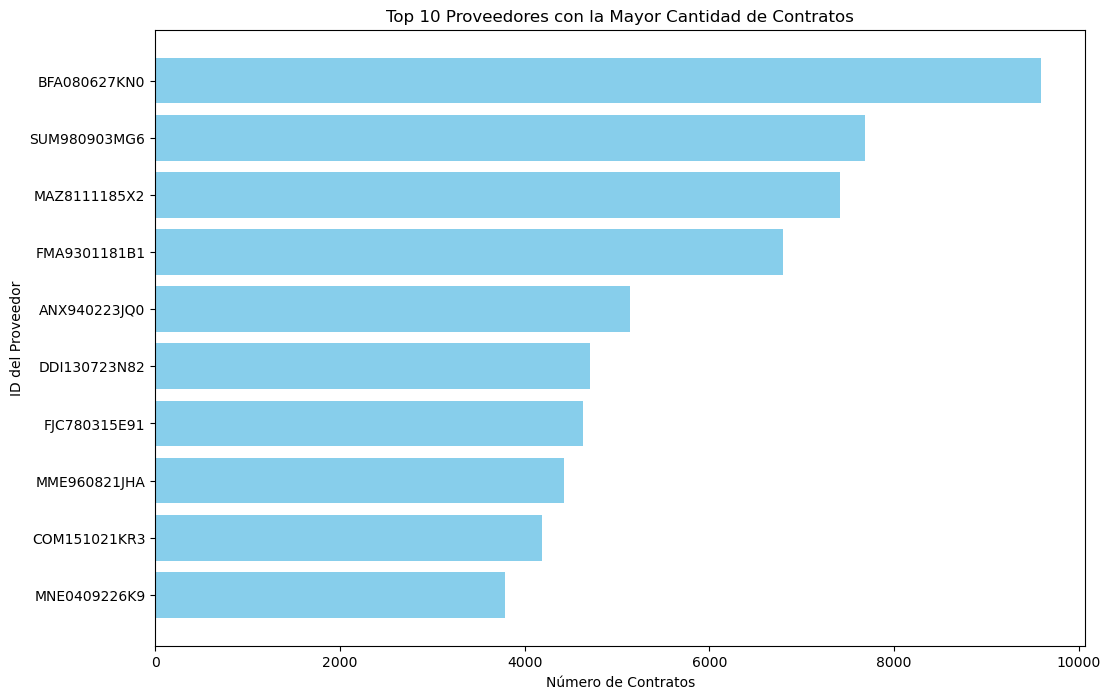

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegúrate de cargar tu dataframe
# proveedores_df = pd.read_csv('ruta_a_tu_archivo.csv')  # Ajusta esta línea a tu contexto

# Llenar los valores NaN en la columna `cve_contrato` con 0
proveedores_df['cve_contrato'] = proveedores_df['cve_contrato'].fillna(0)

# Convertir la columna `cve_contrato` a `int64`
proveedores_df['cve_contrato'] = proveedores_df['cve_contrato'].astype('int64')

# Contar el número de contratos por proveedor
contratos_por_proveedor = proveedores_df.groupby('identifier_id')['cve_contrato'].nunique().reset_index()
contratos_por_proveedor.columns = ['identifier_id', 'num_contratos']

# Calcular el número promedio de contratos por proveedor
promedio_contratos_por_proveedor = contratos_por_proveedor['num_contratos'].mean()

# Proveedores con la mayor cantidad de contratos (top 10)
top_proveedores = contratos_por_proveedor.sort_values(by='num_contratos', ascending=False).head(10)

# Resultados
print(f"Número promedio de contratos por proveedor: {promedio_contratos_por_proveedor:.2f}")
print("Proveedores con la mayor cantidad de contratos (top 10):")
print(top_proveedores)

# Visualización de los top 10 proveedores con más contratos
plt.figure(figsize=(12, 8))
plt.barh(top_proveedores['identifier_id'], top_proveedores['num_contratos'], color='skyblue')
plt.xlabel('Número de Contratos')
plt.ylabel('ID del Proveedor')
plt.title('Top 10 Proveedores con la Mayor Cantidad de Contratos')
plt.gca().invert_yaxis()
plt.show()
